In [1]:
import sys
import logging

formatter = logging.Formatter('%(asctime)s - %(threadName)s - %(name)s - %(levelname)s - %(message)s')
ch = logging.StreamHandler(sys.stdout)
ch.setLevel(logging.DEBUG)
ch.setFormatter(formatter)
logging.basicConfig(level=logging.DEBUG, handlers=[ch])

import open3d as o3d
import numpy as np
np.set_printoptions(suppress=True)

import hough_plane_python as hpp
import vizualization as viz

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Read point cloud

Number of points: 3766


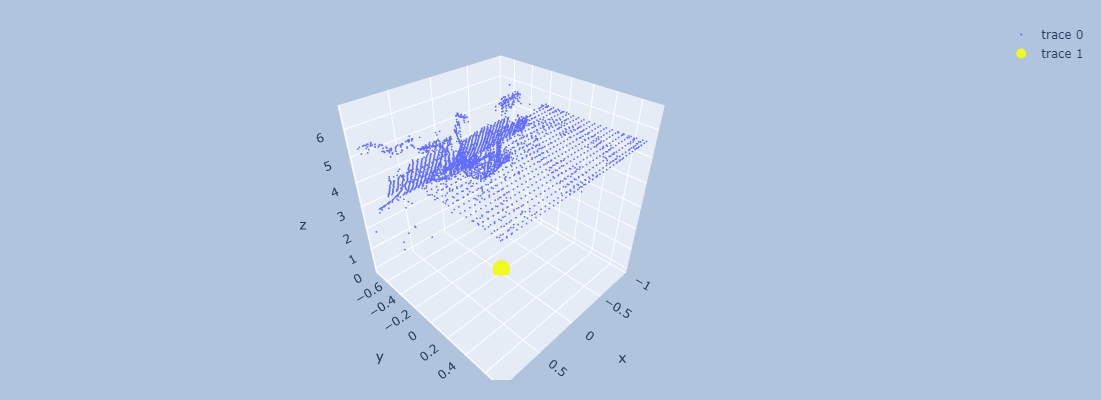

In [2]:
pcd = o3d.io.read_point_cloud('RES/10.pcd')
pcd = pcd.voxel_down_sample(voxel_size=0.05)
points = np.asarray(pcd.points)

print('Number of points:', len(points))

viz.show_points(points)

# Help

In [3]:
help(hpp)

Help on module hough_plane_python:

NAME
    hough_plane_python

FUNCTIONS
    hough_planes(points, threshold, use_tqdm=True, fi_step=1, fi_bounds=(0, 360), theta_step=1, theta_bounds=(0, 180), depth_steps=100, depth_bounds=(0, None), depth_start_step=3, dbscan_eps=3, dbscan_min_points=5)
        Detects planes in 3D point clouds using Hough Transform algorithm.
        
        Algorithm transforms 3D points (e. g. [1.0, -2.0, 0.0]) into parameter space
        with axes φ (fi), θ (theta), d.
        These 3 parameters represent planes in 3D space. Angles φ and θ define normal vector,
        and d defines distance from zero to plane, orthogonal to this vector.
        
        After filling accumulator, we clusterize it via dbscan algorithm.
        Then, for every cluster we find its center of mass to get plane representation
        and its size for comparsion with other clusters.
        
        ---
        General parameters:
        :param points: 3D points as numpy array with 

# Find all planes in the scene

In [4]:
planes, points_best = hpp.hough_planes(points, threshold=1000, fi_step=2, theta_step=2)

2023-12-12 10:26:58,380 - MainThread - Hough Plane - DEBUG - depth_bounds: [0, 13.217001]


100%|██████████| 3766/3766 [00:01<00:00, 2223.82it/s]


2023-12-12 10:27:00,407 - MainThread - Hough Plane - DEBUG - Detect clusters in parameter space
2023-12-12 10:27:00,408 - MainThread - Hough Plane - DEBUG - ~~~~~~~~~~~~0~~~~~~~~~~~~
2023-12-12 10:27:00,410 - MainThread - Hough Plane - DEBUG - coord=[18.25357249  1.95549087 41.        ], cluster_size=114
2023-12-12 10:27:00,411 - MainThread - Hough Plane - DEBUG - fi,theta,depth = (0.6371698802386803,0.06825950841366354,5.41897041)
2023-12-12 10:27:00,412 - MainThread - Hough Plane - DEBUG - plane point: [0.29708537 0.21988895 5.40635084]
2023-12-12 10:27:00,414 - MainThread - Hough Plane - DEBUG - ~~~~~~~~~~~~1~~~~~~~~~~~~
2023-12-12 10:27:00,415 - MainThread - Hough Plane - DEBUG - coord=[135.56527724  40.56897867   7.43102133], cluster_size=45
2023-12-12 10:27:00,416 - MainThread - Hough Plane - DEBUG - fi,theta,depth = (4.73212087826887,1.416124503772986,0.9821581640745494)
2023-12-12 10:27:00,417 - MainThread - Hough Plane - DEBUG - plane point: [ 0.01914725 -0.97024439  0.1513072

In [5]:
planes

array([[  0.29708537,   0.21988895,   5.40635084, 114.        ],
       [  0.01914725,  -0.97024439,   0.15130721,  45.        ],
       [  0.41239213,  -0.29366884,   5.34785695, 100.        ]])

## Vizualize Hough space accumulator 
### (note that here same cluster at d=40 is splitted into two cue to accumulator structure)

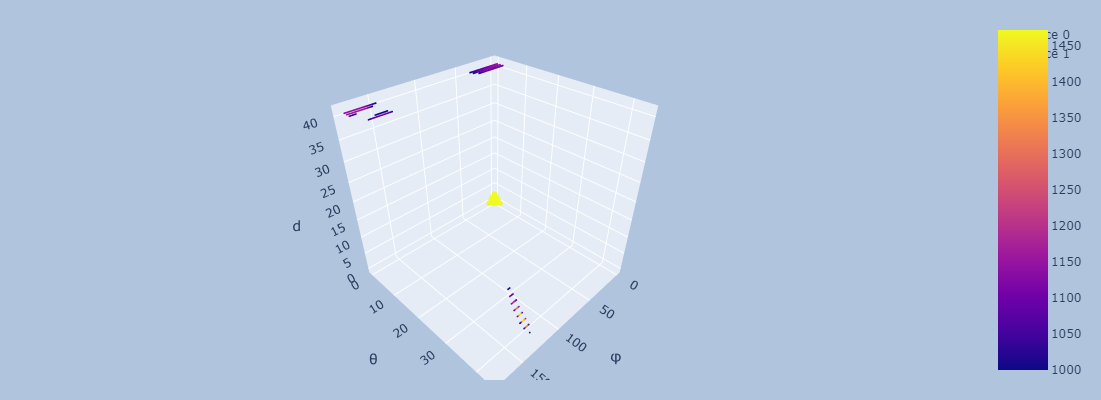

In [6]:
viz.show_points(points_best, is_hough_space=True)

## Vizualize resulting planes

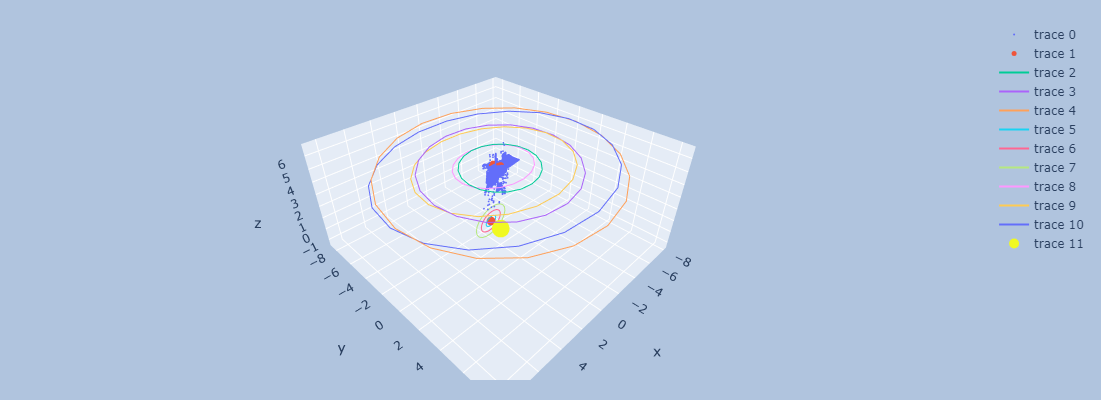

In [7]:
viz.visualize_plane(points, planes[:,:3])

# Variations

## Narrow search by d (lower threshold due to fewer points)

2023-12-12 10:27:42,257 - MainThread - Hough Plane - DEBUG - depth_bounds: [0, 4]


100%|██████████| 3766/3766 [00:04<00:00, 841.89it/s] 


2023-12-12 10:27:47,801 - MainThread - Hough Plane - DEBUG - Detect clusters in parameter space
2023-12-12 10:27:47,802 - MainThread - Hough Plane - DEBUG - ~~~~~~~~~~~~1~~~~~~~~~~~~
2023-12-12 10:27:47,804 - MainThread - Hough Plane - DEBUG - coord=[135.74986479  42.          21.15413737], cluster_size=5
2023-12-12 10:27:47,805 - MainThread - Hough Plane - DEBUG - fi,theta,depth = (4.738564199507352,1.4660765716752369,0.8461654948620877)
2023-12-12 10:27:47,807 - MainThread - Hough Plane - DEBUG - plane point: [ 0.02202472 -0.84124184  0.08844838]
2023-12-12 10:27:47,808 - MainThread - Hough Plane - DEBUG - ~~~~~~~~~~~~0~~~~~~~~~~~~
2023-12-12 10:27:47,809 - MainThread - Hough Plane - DEBUG - coord=[135.61702128  39.80992908  28.74964539], cluster_size=5
2023-12-12 10:27:47,811 - MainThread - Hough Plane - DEBUG - fi,theta,depth = (4.733927086047599,1.3896286747935562,1.1499858156028369)
2023-12-12 10:27:47,812 - MainThread - Hough Plane - DEBUG - plane point: [ 0.02436127 -1.13090276

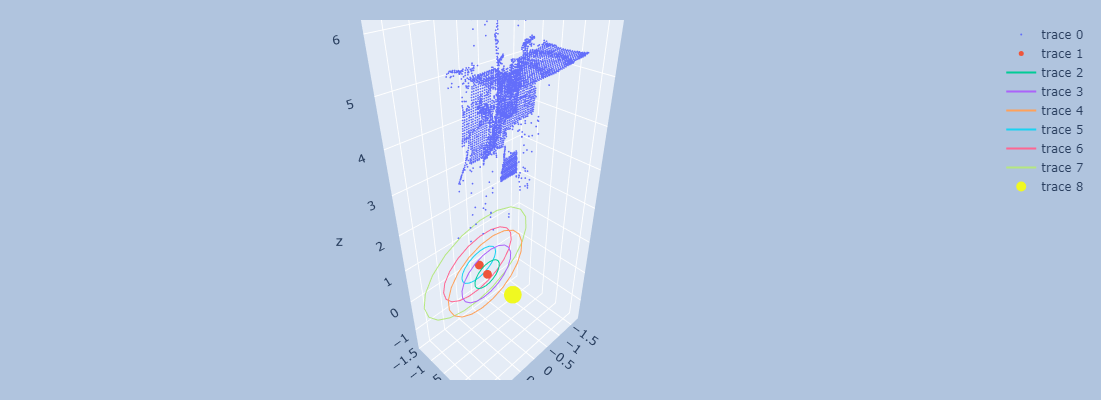

In [8]:
planes, points_best = hpp.hough_planes(points, threshold=500, fi_step=2, theta_step=2, depth_bounds=(0, 4))

viz.visualize_plane(points, planes[:,:3])

2023-12-12 10:28:08,936 - MainThread - Hough Plane - DEBUG - depth_bounds: [4, 13.217001]


100%|██████████| 3242/3242 [00:00<00:00, 3902.53it/s]


2023-12-12 10:28:10,140 - MainThread - Hough Plane - DEBUG - Detect clusters in parameter space
2023-12-12 10:28:10,141 - MainThread - Hough Plane - DEBUG - ~~~~~~~~~~~~0~~~~~~~~~~~~
2023-12-12 10:28:10,142 - MainThread - Hough Plane - DEBUG - coord=[ 3.33991266  2.82454148 15.        ], cluster_size=11
2023-12-12 10:28:10,144 - MainThread - Hough Plane - DEBUG - fi,theta,depth = (0.11658494542317406,0.09859509753493208,5.382550150000001)
2023-12-12 10:28:10,144 - MainThread - Hough Plane - DEBUG - plane point: [0.52623698 0.06163079 5.35640947]
2023-12-12 10:28:10,145 - MainThread - Hough Plane - DEBUG - ~~~~~~~~~~~~1~~~~~~~~~~~~
2023-12-12 10:28:10,148 - MainThread - Hough Plane - DEBUG - coord=[166.02566547   2.58579994  15.        ], cluster_size=53
2023-12-12 10:28:10,149 - MainThread - Hough Plane - DEBUG - fi,theta,depth = (5.795389010362406,0.09026144566037915,5.382550150000001)
2023-12-12 10:28:10,150 - MainThread - Hough Plane - DEBUG - plane point: [ 0.42859005 -0.22739308  

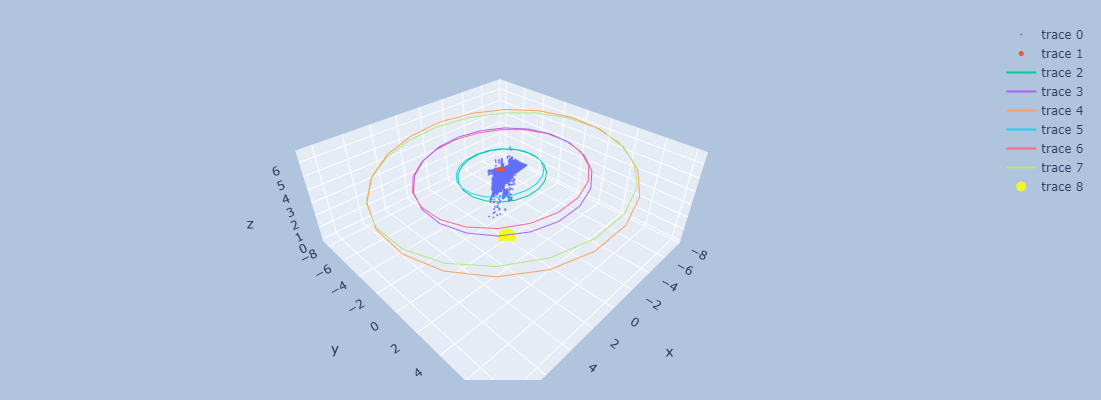

In [9]:
planes, points_best = hpp.hough_planes(points, threshold=1000, fi_step=2, theta_step=2, 
                                       depth_bounds=(4, None), depth_start_step=0)

viz.visualize_plane(points, planes[:,:3])

## Narrow search by φ and θ with increase in accuracy

2023-12-12 10:40:57,906 - MainThread - Hough Plane - DEBUG - depth_bounds: [0, 4]


100%|██████████| 3766/3766 [00:00<00:00, 13155.54it/s]


2023-12-12 10:40:58,361 - MainThread - Hough Plane - DEBUG - Detect clusters in parameter space
2023-12-12 10:40:58,361 - MainThread - Hough Plane - DEBUG - ~~~~~~~~~~~~0~~~~~~~~~~~~
2023-12-12 10:40:58,368 - MainThread - Hough Plane - DEBUG - coord=[19.61153209 12.60002419 15.66673112], cluster_size=13817
2023-12-12 10:40:58,369 - MainThread - Hough Plane - DEBUG - fi,theta,depth = (4.708998958366921,1.5062193555655974,0.6266692448735389)
2023-12-12 10:40:58,370 - MainThread - Hough Plane - DEBUG - plane point: [-0.00211999 -0.62535944  0.04044028]
2023-12-12 10:40:58,370 - MainThread - Hough Plane - DEBUG - ~~~~~~~~~~~~~~~~~~~~~~~~


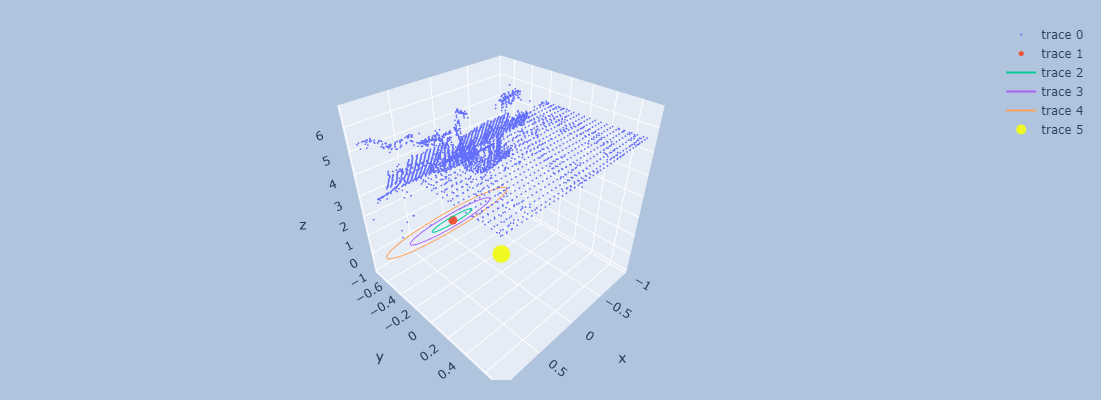

In [10]:
planes, points_best = hpp.hough_planes(points, threshold=100, 
                                       fi_step=0.5, fi_bounds=(180+80,180+100),
                                       theta_step=0.5, theta_bounds=(80,100),
                                       depth_bounds=(0, 4))

viz.visualize_plane(points, planes[:,:3])

## You can avoid cluster splitting if bounds are selected correctly. Here we have 180° shift in φ bounds:

2023-12-12 10:41:10,859 - MainThread - Hough Plane - DEBUG - depth_bounds: [0, 13.217001]


100%|██████████| 3766/3766 [00:01<00:00, 2486.76it/s]


2023-12-12 10:41:12,672 - MainThread - Hough Plane - DEBUG - Detect clusters in parameter space
2023-12-12 10:41:12,673 - MainThread - Hough Plane - DEBUG - ~~~~~~~~~~~~0~~~~~~~~~~~~
2023-12-12 10:41:12,675 - MainThread - Hough Plane - DEBUG - coord=[45.56527724 40.56897867  7.43102133], cluster_size=45
2023-12-12 10:41:12,676 - MainThread - Hough Plane - DEBUG - fi,theta,depth = (4.73212087826887,1.416124503772986,0.9821581640745494)
2023-12-12 10:41:12,676 - MainThread - Hough Plane - DEBUG - plane point: [ 0.01914725 -0.97024439  0.15130721]
2023-12-12 10:41:12,677 - MainThread - Hough Plane - DEBUG - ~~~~~~~~~~~~1~~~~~~~~~~~~
2023-12-12 10:41:12,680 - MainThread - Hough Plane - DEBUG - coord=[91.47839115  2.30444897 40.8334934 ], cluster_size=214
2023-12-12 10:41:12,681 - MainThread - Hough Plane - DEBUG - fi,theta,depth = (6.334790893544881,0.08044044390523321,5.396963230867043)
2023-12-12 10:41:12,683 - MainThread - Hough Plane - DEBUG - plane point: [0.43308875 0.02236966 5.3795

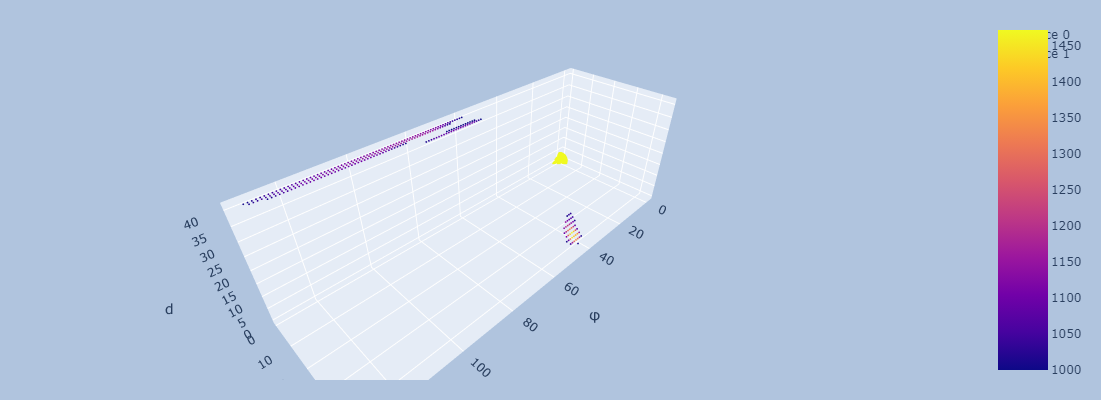

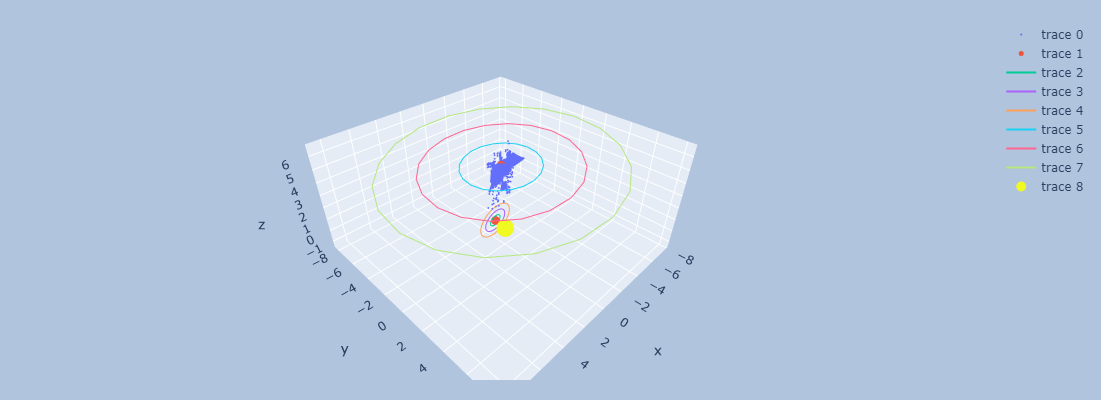

In [11]:
planes, points_best = hpp.hough_planes(points, threshold=1000, fi_step=2, theta_step=2, 
                                       fi_bounds=(180,540))

viz.show_points(points_best, is_hough_space=True)
viz.visualize_plane(points, planes[:,:3])